# Homework-2

# PART-1 Identity System Evaluation

### (a) For each of the systems, plot the genuine and impostor score distributions.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sys1 = np.loadtxt('simMatrix1.txt', delimiter=' ')
sys2 = np.loadtxt('simMatrix2.txt', delimiter=' ')

In [3]:
genuine_sys1 = sys1.diagonal()
genuine_sys2 = sys2.diagonal()

In [4]:
non_diag = np.ones(shape=sys1.shape, dtype = bool)^np.identity(len(sys1)).astype(bool)
imposter_sys1 = sys1[non_diag==True]

In [5]:
non_diag = np.ones(shape=sys2.shape, dtype = bool)^np.identity(len(sys2)).astype(bool)
imposter_sys2 = sys2[non_diag==True]

Text(0.5, 1.0, 'Distribution of the Systems')

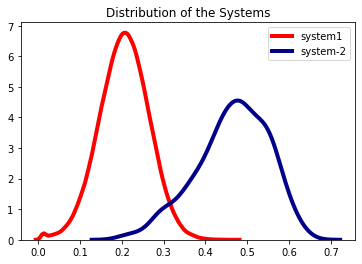

In [6]:
# Density Plot
s1 = sns.distplot(imposter_sys1, hist=False, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label = 'system1')

s2 = sns.distplot(genuine_sys1, hist=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='system-2')
plt.title('Distribution of the Systems')

Text(0.5, 1.0, 'Distribution of the Systems')

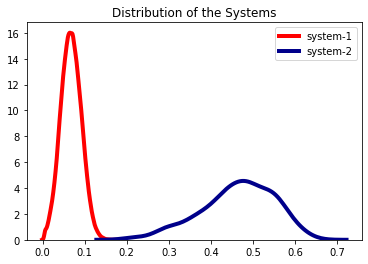

In [7]:
# Density Plot and Histogram of all arrival delays
s1 = sns.distplot(imposter_sys2, hist=False, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='system-1')

s2 = sns.distplot(genuine_sys1, hist=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='system-2')
plt.title('Distribution of the Systems')

## Cumulative Match Characteristic Curve

### (b) For each of the systems, plot the Cumulative Match Characteristic curves.

### (c) For each of the systems, calculate the d’ (decidability index).

In [8]:
ordered_sys1 = np.zeros((466,466))
for i in range(0,len(sys1)):
    row = sys1[i]
    sort_row = np.sort(row)[::-1]
    ordered_sys1[i] = sort_row

In [9]:
ordered_sys2 = np.zeros((466,466))
for i in range(0,len(sys2)):
    row = sys2[i]
    sort_row = np.sort(row)[::-1]
    ordered_sys2[i] = sort_row

### System1

In [10]:
rank_prob1 = []
for t in range(1,len(genuine_sys1)):
    prob = 0
    for r in range(0,len(ordered_sys1)):
        row = ordered_sys1[r]
        topt = row[0:t]
        if(np.isin(genuine_sys1[r],topt)):
            prob+=1
    prob = prob/466*100
    rank_prob1.append(prob)

In [11]:
t1 = np.arange(1,466)

Text(0.5, 1.0, 'Cumulative Match Characteristics')

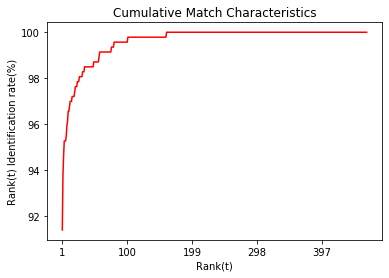

In [12]:
plt.plot(t1,rank_prob1,'r')
plt.xlabel('Rank(t)')
plt.ylabel('Rank(t) Identification rate(%)')
plt.xticks(np.arange(1, 466, step=99))
plt.title('Cumulative Match Characteristics')

#### Decidability Index

In [13]:
mean_genuine = np.mean(genuine_sys1)
mean_imposter = np.mean(imposter_sys1)
std_genuine = np.std(genuine_sys1)
std_imposter = np.std(imposter_sys1)
d1 = np.sqrt(2)*np.absolute(mean_genuine-mean_imposter)/np.sqrt(std_genuine**2+std_imposter**2)
print("Decidability Index =",d1)

Decidability Index = 3.516470545146112


### (d) For each system, what is the lowest rank at which the system achieves performance greaterthan 70%?

#### <font color=red> System1 achieves performance greater than 70% from rank 1</font>

### System2

In [14]:
rank_prob2 = []
for t in range(1,len(genuine_sys2)):
    prob = 0
    for r in range(0,len(ordered_sys2)):
        row = ordered_sys2[r]
        topt = row[0:t]
        if(np.isin(genuine_sys2[r],topt)):
            prob+=1
    prob = prob/466*100
    rank_prob2.append(prob)

In [15]:
t2 = np.arange(1,466)

Text(0.5, 1.0, 'Cumulative Match Characteristics')

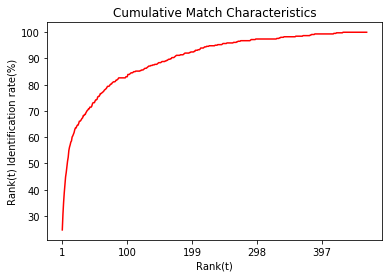

In [16]:
plt.plot(t2,rank_prob2,'r')
plt.xlabel('Rank(t)')
plt.ylabel('Rank(t) Identification rate(%)')
plt.xticks(np.arange(1, 466, step=99))
plt.title('Cumulative Match Characteristics')

#### Decidability Index

In [17]:
mean_genuine = np.mean(genuine_sys2)
mean_imposter = np.mean(imposter_sys2)
std_genuine = np.std(genuine_sys2)
std_imposter = np.std(imposter_sys2)
d2 = np.sqrt(2)*np.absolute(mean_genuine-mean_imposter)/np.sqrt(std_genuine**2+std_imposter**2)
print("Decidability Index =",d2)

Decidability Index = 1.7116813276236182


### (d) For each system, what is the lowest rank at which the system achieves performance greaterthan 70%?

#### <font color=red> System1 achieves performance greater than 70% from rank 40</font>

# PART-2 Verification System Evaluation

## ROC Curve

### (e) For each of the systems, plot the Receiver Operating Curve (FAR vs. FRR)

### (f) For each of the systems, calculate the Equal Error Rate. At what operating point is this rate achieved for each system?

### (g) For each of the systems, determine what the FRR is when the FAR = 1%, FAR = 5%, FAR = 10%, and FAR = 20%. Present results in tabular format.

### System1

In [18]:
FAR=[]
FRR=[]
thresh = []
t=0
while(t<=1):
    thresh.append(t)
    far=len(imposter_sys1[imposter_sys1>t])/len(imposter_sys1)
    FAR.append(far)
    frr=len(genuine_sys1[genuine_sys1<t])/len(genuine_sys1)
    FRR.append(frr)
    t+=0.0001
    
FAR=np.round(np.array(FAR)*100)
FRR=np.round(np.array(FRR)*100)

Text(0.5, 1.0, 'ROC Curve')

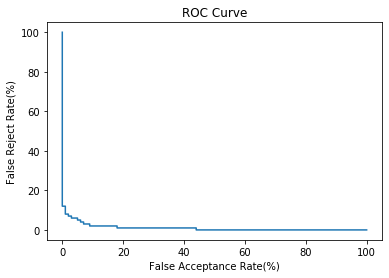

In [19]:
plt.plot(FAR,FRR)
plt.xlabel('False Acceptance Rate(%)')
plt.ylabel('False Reject Rate(%)')
plt.title('ROC Curve')

### Equal Error Rate 

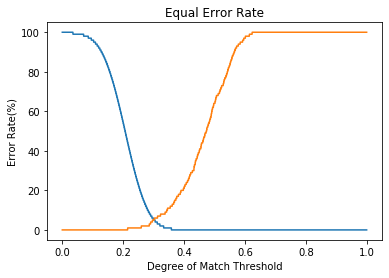

In [20]:
p1 = plt.plot(thresh,FAR)
p2 = plt.plot(thresh,FRR)
plt.xlabel('Degree of Match Threshold')
plt.ylabel('Error Rate(%)')
plt.title("Equal Error Rate")
plt.show()

In [21]:
eer = FRR[np.argmin(np.absolute(FAR-FRR))]
print('Equal Error Rate',eer)
op_point = thresh[np.argmin(np.absolute(FAR-FRR))]
print('Operating Point',op_point)

Equal Error Rate 5.0
Operating Point 0.29919999999998337


#### <font color=red> Equal Error rate for system 1 is at 5%. The Operating Point or match threshold is 0.29</font>

In [22]:
frr1 = np.min(FRR[np.where(FAR==1)])
frr5 = np.min(FRR[np.where(FAR==5)])
frr10 = np.min(FRR[np.where(FAR==10)])
frr20 = np.min(FRR[np.where(FAR==20)])

In [23]:
data = [['1%', frr1], ['5%', frr5], ['10%', frr10], ['20%', frr20]] 
df = pd.DataFrame(data, columns = ['FRR', 'FAR']) 
df 

,FRR,FAR
0,1%,8.0
1,5%,5.0
2,10%,2.0
3,20%,1.0


### System2 

In [24]:
FAR=[]
FRR=[]
thresh = []
t=0
while(t<=1):
    thresh.append(t)
    far=len(imposter_sys2[imposter_sys2>t])/len(imposter_sys2)
    FAR.append(far)
    frr=len(genuine_sys2[genuine_sys2<t])/len(genuine_sys2)
    FRR.append(frr)
    t+=0.0001
    
FAR=np.round(np.array(FAR)*100,2)
FRR=np.round(np.array(FRR)*100,2)

Text(0.5, 1.0, 'ROC Curve')

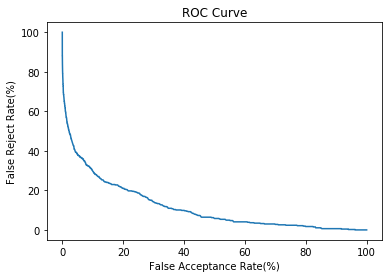

In [25]:
plt.plot(FAR,FRR)
plt.xlabel('False Acceptance Rate(%)')
plt.ylabel('False Reject Rate(%)')
plt.title('ROC Curve')

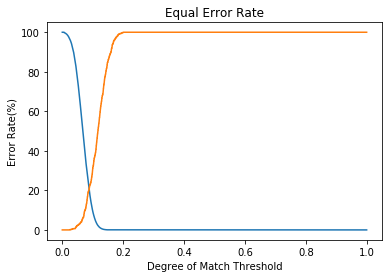

In [26]:
p1 = plt.plot(thresh,FAR)
p2 = plt.plot(thresh,FRR)
plt.xlabel('Degree of Match Threshold')
plt.ylabel('Error Rate(%)')
plt.title("Equal Error Rate")
plt.show()

In [27]:
eer = FRR[np.argmin(np.absolute(FAR-FRR))]
print('Equal Error Rate',eer)
op_point = thresh[np.argmin(np.absolute(FAR-FRR))]
print('Operating Point',op_point)

Equal Error Rate 20.6
Operating Point 0.0880000000000015


#### <font color=red>  Equal Error rate for system 2 is at 20.6%. The Operating Point or match threshold is 0.088</font>

In [28]:
frr1 = np.min(FRR[np.where(np.absolute(FAR-1)<=0.02)])
frr5 = np.min(FRR[np.where(np.absolute(FAR-5)<=0.02)])
frr10 = np.min(FRR[np.where(np.absolute(FAR-10)<=0.02)])
frr20 = np.min(FRR[np.where(np.absolute(FAR-20)<=0.05)])

In [29]:
data = [['1%', frr1], ['5%', frr5], ['10%', frr10], ['20%', frr20]] 
df = pd.DataFrame(data, columns = ['FRR', 'FAR']) 
df 

,FRR,FAR
0,1%,60.30
1,5%,38.20
2,10%,29.83
3,20%,21.03


## <font color=red> System 1 performs better than System2. This can be verified by the fact that System1 has a lower equal error rate than System2. Also, the decidability index of system 1 is more than system 2.  </font>

References:
[1] https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0